In [2]:
import pandas as pd
import os 
# Specify the path to your CSV file
csv_file_path = '/home/jovyan/work/hand_history.csv'

print(os.getcwd())

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now, 'df' contains the data from the CSV file in a DataFrame
# You can perform various operations on 'df'
print(len(df))
print(df.columns)

/home/jovyan


FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/work/hand_history.csv'

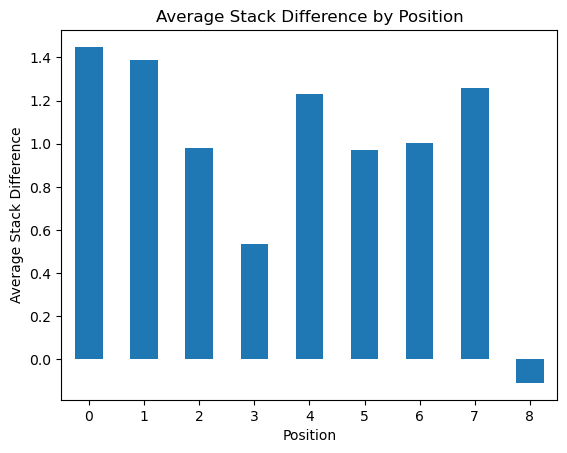

In [4]:
# Avg win/loss by position -- 0 is SB
import matplotlib.pyplot as plt
# Calculate the difference
df['STACK_DIFF'] = df['FINAL_STACK'] - df['INIT_STACK']

# Group by 'POSITION' and calculate mean difference
mean_diff = df.groupby('POSITION')['STACK_DIFF'].mean()

# Plotting
mean_diff.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average Stack Difference')
plt.title('Average Stack Difference by Position')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.show()

In [4]:
# How many showdowns did we win lose
df['STACK_DIFF'] = df['FINAL_STACK'] - df['INIT_STACK']
df['WON'] = df['STACK_DIFF'] > 0
in_showdown = df[df['IN_SHOWDOWN'] == True]

perc = len(in_showdown) / len(df)
print(f"In showdown: {100*perc:.2f}%")

won_showdown = in_showdown[in_showdown['WON'] == True]
perc_won = len(won_showdown) / len(in_showdown)
print(f"Won showdown: {100*perc_won:.2f}%")

In showdown: 14.98%
Won showdown: 31.78%


In [9]:
# Print indicies when lost as button (index 8 with 9 players)

lost_as_button = df[ (df['STACK_DIFF'] < -15) & (df['POSITION'] == 8) ]

# Get the original DataFrame indices for the first 10 rows of the filtered DataFrame
def print_first_10(filtered_df, desc: str):
    first_10_indices = filtered_df.head(10).index

    print(f"{desc} {len(filtered_df)}")
    print("Original indices of the first 10 rows:")
    print(first_10_indices)

print_first_10(lost_as_button, "Lost as Button")
# Url is http://localhost:5173/poker_eval/hh/1261.json
# row = df.iloc[8]

# print(row['STACK_DIFF'])

Lost as Button 153
Original indices of the first 10 rows:
Index([176, 542, 552, 718, 797, 878, 1159, 1252, 1261, 1272], dtype='int64')


In [1]:
# Has hero ever folded the best hand

folded_best = df[ (df['HND_RNK_RIVER'] == 1) & (df['STACK_DIFF'] < 0) ]

print_first_10(folded_best, f"Folded best river hand")

folded_best = df[ (df['HND_RNK_TURN'] == 1) & (df['STACK_DIFF'] < 0) ]

print_first_10(folded_best, f"Folded best turn hand")

df['IN_SHOWDOWN'] = df['IN_SHOWDOWN'].astype(bool)
# print(df['IN_SHOWDOWN'].unique())
folded_best = df[ (df['HND_RNK_FLOP'] == 1) & (df['STACK_DIFF'] < -1) & (df['IN_SHOWDOWN'] == False) ]

print_first_10(folded_best, f"Folded best flop hand")

folded_best.head(10)[['HERO_EQ_FLOP', 'HERO_EQ_TURN', 'HERO_EQ_RIVER']] * 100


NameError: name 'df' is not defined

In [2]:
from pathlib import Path
import pandas as pd
import os 

print(os.getcwd())

# Specify the path to your CSV file
csv_file_path = Path('/home/jovyan/work/hand_history.csv')

# print(list(csv_file_path.parent.iterdir()))


# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

df['NODE1'] = (df['POSITION']  / 3).astype(int)
df['NODE1'].unique()

preflop = df[df['ACT_PREFLOP'].notna()].copy()

preflop['NODE2'] = preflop['PLR_START_PREFLOP'].apply(lambda x: max(4, x))
preflop['NODE2'].unique()


flop = df[df['ACT_FLOP'].notna()].copy()

print("Actions preflop: " + str(flop['ACT_FLOP'].unique()))

flop['NODE2'] = flop['PLR_START_FLOP'].apply(lambda x: max(4, x))
flop['NODE2'].unique()




/home/jovyan
Actions preflop: ['Fold' 'Check' 'Bet' 'Call' 'Raise']


array([8, 6, 7, 4, 5, 9])